# Burst Size anf Frequencies of eRNAs in WT macrophages

## Load code

In [1]:
ENV["Code"] = "../../Code"
for folder in readdir(ENV["Code"]); push!(LOAD_PATH, normpath(ENV["Code"], folder));end

include(ENV["Code"]*"/../Code_Paper/Databases/Cuartero2018.jl")
include(ENV["Code"]*"/../Code_Paper/Databases/mm9.jl")
include(ENV["Code"]*"/../Code_Paper/Code/meanmRNAcounts_BSBF.jl")
# Make summary of enhancer burst frequencies
include("BurstFreqSizeEnhancer.jl")
include("PlottingFunctions.jl")

tss_data (generic function with 1 method)

## Make figure panels

In [2]:
bf = BFs[!,["Sample",
 "Genotype",
 "Timepoint",
 "N_cells",
 "CellsActive1_TSS",
 "CellsActive2_TSS",
 "TSS_N",
 "BF_TSS",
 "Rep",
 "Gene"]]
rename!(bf, :Gene=>:Probe)

CSV.write("../SourceData/Fig2_BF.csv", bf)

pr = unique(bf[!,:Probe])
lims = [1,1,1,1,0]
df = vcat([tss_data(get_completeset(pr[ii]); limit = lims[ii]) for ii in 1:5]...)
rename!(df, :Gene=>:Probe)
CSV.write("../SourceData/Fig2_BS.csv", df)


"../SourceData/Fig2_BS.csv"

┌ Warning: RCall.jl: Loading required package: grid
└ @ RCall /Users/irr15/.julia/packages/RCall/iMDW2/src/io.jl:160
┌ Warning: RCall.jl: 
│ Attaching package: ‘DescTools’
│ 
│ The following objects are masked from ‘package:psych’:
│ 
│     AUC, ICC, SD
│ 
└ @ RCall /Users/irr15/.julia/packages/RCall/iMDW2/src/io.jl:160
┌ Warning: RCall.jl: 
│ Attaching package: ‘rcompanion’
│ 
│ The following object is masked from ‘package:psych’:
│ 
│     phi
│ 
└ @ RCall /Users/irr15/.julia/packages/RCall/iMDW2/src/io.jl:160
┌ Warning: RCall.jl: 
│ Attaching package: ‘dplyr’
│ 
│ The following objects are masked from ‘package:stats’:
│ 
│     filter, lag
│ 
│ The following objects are masked from ‘package:base’:
│ 
│     intersect, setdiff, setequal, union
│ 
└ @ RCall /Users/irr15/.julia/packages/RCall/iMDW2/src/io.jl:160
┌ Warning: RCall.jl: Warning in (x[1L, 1L, ] + x[2L, 2L, ]) * x[1L, 2L, ] * x[2L, 1L, ] + (x[1L,  :
│   NAs produced by integer overflow
└ @ RCall /Users/irr15/.julia/packages/RCa

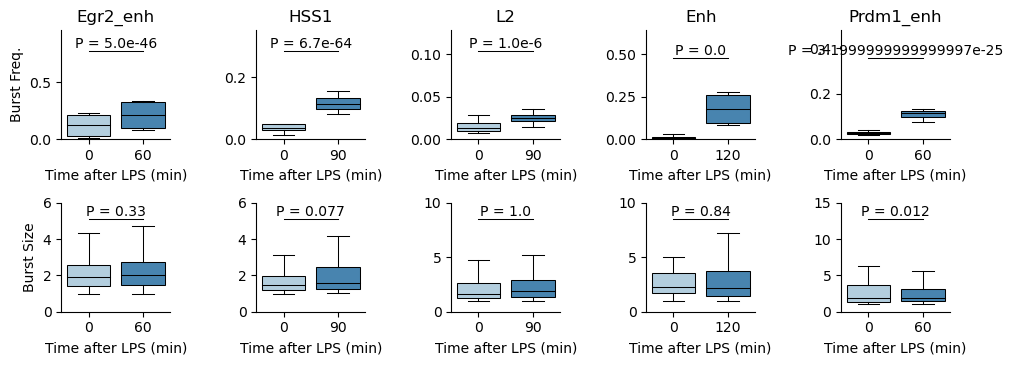

In [3]:
figure(figsize = (14*0.75, 5*0.75))

r= 2
c = 5

f = plot_bf

subplot(r, c, 1)
n = 1.2
gene = "Egr2_enh"
f(gene, scale = "min")
genefreq = BFs[BFs[!,:Gene].==gene, :]
tests = [do_mantelhaen(genefreq, "WT_0", "WT_60")]
add_tests3(tests, [0.65]*n, u = 0.05*n)
ylim(0, 0.8*n); squareplot()

subplot(r, c, 2)
n = 0.44
gene = "HSS1"
f(gene, scale = "min")
genefreq = BFs[BFs[!,:Gene].==gene, :]
tests = [do_mantelhaen(genefreq, "WT_0", "WT_90")]
add_tests3(tests, [0.65]*n, u = 0.05*n)
ylim(0, 0.8*n); squareplot()

ylabel("")

subplot(r, c, 3)

gene = "L2"
n = 0.16
f(gene, scale = "min")
genefreq = BFs[BFs[!,:Gene].==gene, :]
tests = [do_mantelhaen(genefreq, "WT_0", "WT_90")]
add_tests3(tests, [0.65]*n, u = 0.05*n)
ylim(0, 0.8*n); squareplot()

ylabel("")

subplot(r, c, 4)

gene = "Enh"
f(gene, scale = "min")
genefreq = BFs[BFs[!,:Gene].==gene, :]
tests = [do_mantelhaen(genefreq, "WT_0", "WT_120")]
n = 8
add_tests3(tests, [0.06].*n, u = 0.005*n)
ylim(0, 0.08*n); squareplot()

ylabel("")


subplot(r, c, 5)

gene = "Prdm1_enh"
f(gene, scale = "min")
genefreq = BFs[BFs[!,:Gene].==gene, :]
tests = [do_mantelhaen(genefreq, "WT_0", "WT_60")]
n = 6
add_tests3(tests, [0.06].*n, u = 0.005*n)
ylim(0, 0.08*n); squareplot()

ylabel("")

f = plot_bs

subplot(r, c, 6)
gene = "Egr2_enh"

n = 0.3
a = f(gene,limitbs, 0, 60, maxy = 20*n, scale = "min")
tests = add_tests_bs(a, ["WT_60-WT_0"])
add_tests4(tests, [17*n], u = 1.3*n)
title("")


subplot(r, c, 7)
gene = "HSS1"

n = 0.3
a = f(gene,limitbs, 0, 90, maxy = 20*n, scale = "min")
tests = add_tests_bs(a, ["WT_90-WT_0"])
add_tests4(tests, [17*n], u = 1.3*n)
title("")

ylabel("")

subplot(r, c, 8)
gene = "L2"

n = 0.5
a = f(gene,limitbs, 0, 90, maxy = 20*n, scale = "min")
tests = add_tests_bs(a, ["WT_90-WT_0"])
add_tests4(tests, [17*n], u = 1.3*n)
title("")

ylabel("")
subplot(r, c, 9)
gene = "Enh"

n =0.5
a = f(gene,limitbs, 0, 120, maxy = 20*n, scale = "min")
tests = add_tests_bs(a, ["WT_120-WT_0"])
add_tests4(tests, [17*n], u = 1.3*n)
title("")

ylabel("")

subplot(r, c, 10)
gene = "Prdm1_enh"

n =0.75
a = f(gene,limitbs, 0, 60, maxy = 20*n, scale = "min")
tests = add_tests_bs(a, ["WT_60-WT_0"])
add_tests4(tests, [17*n], u = 1.3*n)
title("")

ylabel("")

plt.tight_layout()

savefigwithtext("WT_enhancers.svg")

In [4]:
import Pkg; Pkg.status()

      Status `~/.julia/environments/v1.6/Project.toml`
  [7e6ae17a] BioSequences v2.0.5
  [336ed68f] CSV v0.9.11
  [8f4d0f93] Conda v1.5.2
  [a93c6f00] DataFrames v1.2.2
  [31c24e10] Distributions v0.25.28
  [c2308a5c] FASTX v1.2.0
  [09f84164] HypothesisTests v0.10.6
  [7073ff75] IJulia v1.23.2
  [916415d5] Images v0.24.1
  [96684042] InformationMeasures v0.3.1
  [10e44e05] MATLAB v0.8.2
  [f8716d33] MultipleTesting v0.5.0
  [92933f4c] ProgressMeter v1.7.1
  [438e738f] PyCall v1.92.5
  [d330b81b] PyPlot v2.10.0
  [6f49c342] RCall v0.13.12
  [d2ef9438] Seaborn v1.0.0
  [2913bbd2] StatsBase v0.33.13
